In [35]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T

In [43]:
# Para esse exercicio, precisamos comparar diferentes tipos de funções de ponderações com a solução exata, tomando bastante cuidado para satisfazermos as condições de
# contorno fundamentos do problema

# Equação Diferencial
# d²T/dx² = 1 ; x E (0,1)


# Define variável
x = sp.symbols('x')
x0 = 0
x1 = 1

# EDO
Temp = sp.Function('T')(x)
F = sp.Eq((sp.diff(Temp,x,2)),1)

print(sp.latex(F))


# Solução analítica:
f_analitica = (x**2)/2 - x/2

# Solução por Resíduos ponderados:
# Base {sin(pi*x)}

a0 = sp.symbols('a0')

f_residuos_pond = a0*sp.sin(sp.pi*x)

# Defino o residuo
residuo = sp.diff(f_residuos_pond,x,2) -1

# Ortogonalizo em relação a função peso - Integral de 0 a 1 de residuo*w(x) = 0
w = sp.Function('w')(x)

integral_ortogonalizacao = sp.integrate(residuo*w,(x,x0,x1))

eq_ortogonalizacao = sp.Eq(integral_ortogonalizacao, 0)

sp.pprint(eq_ortogonalizacao)

print(sp.latex(eq_ortogonalizacao))
## Com a Equação de Ortogonalização, eu consigo atribuir valores para a base w, e começar a avaliar as soluções

\frac{d^{2}}{d x^{2}} T{\left(x \right)} = 1
  1                                       
  ⌠                          1            
  ⎮  2                       ⌠            
- ⎮ π ⋅a₀⋅w(x)⋅sin(π⋅x) dx - ⎮ w(x) dx = 0
  ⌡                          ⌡            
  0                          0            
- \int\limits_{0}^{1} \pi^{2} a_{0} w{\left(x \right)} \sin{\left(\pi x \right)}\, dx - \int\limits_{0}^{1} w{\left(x \right)}\, dx = 0


In [37]:
# Função de ponderação com mesma base que a solução

b0 = sp.Symbol('b0') 
w1 = b0 * sp.sin(sp.pi * x)
integral = sp.integrate(residuo * w1, (x, 0, 1))
# Resolve a0 (b0 some, pois é comum dos dois lados)
a0_sol = sp.solve(integral, a0)[0]
# Solução final
T_final1 = f_residuos_pond.subs(a0, a0_sol)
sp.pprint(T_final1)
print(sp.latex(T_final1))


-4⋅sin(π⋅x) 
────────────
      3     
     π      
- \frac{4 \sin{\left(\pi x \right)}}{\pi^{3}}


In [38]:
# Função de ponderação com Delta de Dirac

b0 = sp.Symbol('b0') 
w2 = b0 * sp.DiracDelta(x - 0.5)
integral = sp.integrate(residuo * w2, (x, 0, 1))
# Resolve a0 (b0 some, pois é comum dos dois lados)
a0_sol = sp.solve(integral, a0)[0]
# Solução final
T_final2 = f_residuos_pond.subs(a0, a0_sol)
sp.pprint(T_final2)
print(sp.latex(T_final2))


-sin(π⋅x) 
──────────
     2    
    π     
- \frac{\sin{\left(\pi x \right)}}{\pi^{2}}


In [39]:
# Função de ponderação com Heaviside

b0 = sp.Symbol('b0') 
w3 = b0 * (sp.Heaviside(x - 0) - sp.Heaviside(x - 1))
integral = sp.integrate(residuo * w3, (x, 0, 1))
# Resolve a0 (b0 some, pois é comum dos dois lados)
a0_sol = sp.solve(integral, a0)[0]
# Solução final
T_final3 = f_residuos_pond.subs(a0, a0_sol)
sp.pprint(T_final3)
print(sp.latex(T_final3))


-sin(π⋅x) 
──────────
   2⋅π    
- \frac{\sin{\left(\pi x \right)}}{2 \pi}


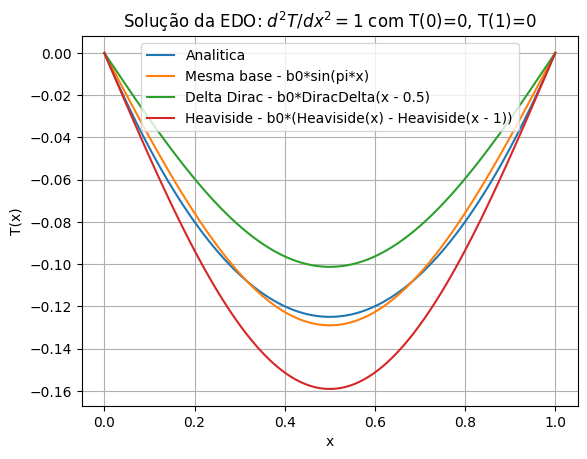

In [44]:
T.prepara_plot(f_analitica,x,x0,x1,"Analitica")
T.prepara_plot(T_final1,x,x0,x1,f"Mesma base - {w1}")
T.prepara_plot(T_final2,x,x0,x1,f"Delta Dirac - {w2}")
T.prepara_plot(T_final3,x,x0,x1,f"Heaviside - {w3}")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Solução da EDO: $d^2T/dx^2 = 1$ com T(0)=0, T(1)=0')
plt.grid(True)
plt.legend()
plt.show()

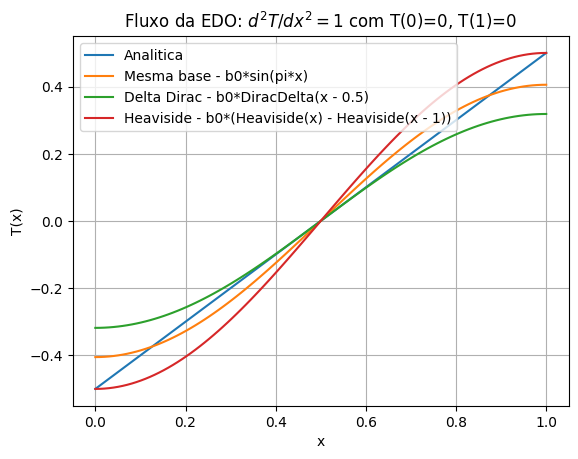

In [45]:
# Se quisermos analisar o fluxo:
Danalitica = sp.diff(f_analitica,x)
Dt1 = sp.diff(T_final1,x)
Dt2 = sp.diff(T_final2,x)
Dt3 = sp.diff(T_final3,x)

T.prepara_plot(Danalitica,x,x0,x1,"Analitica")
T.prepara_plot(Dt1,x,x0,x1,f"Mesma base - {w1}")
T.prepara_plot(Dt2,x,x0,x1,f"Delta Dirac - {w2}")
T.prepara_plot(Dt3,x,x0,x1,f"Heaviside - {w3}")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Fluxo da EDO: $d^2T/dx^2 = 1$ com T(0)=0, T(1)=0')
plt.grid(True)
plt.legend()
plt.show()
